<a href="https://colab.research.google.com/github/HaticeTuran/INF701_KI_Time_Table_Scheduling_Genetic_Algorithm/blob/main/INF701_KI_Time_Table_Scheduling_Genetic_Algortitm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[Inf201, Canan Yıldız, R2, 16.00, Wed] 
[Inf203, Emel Maden, R3, 12.00, Tue] 
[Inf205, Canan Yıldız, R3, 14.00, Tue] 
[Inf209, Faruk Bagcı, R3, 08.00, Wed] 
[Inf303, Omer Karacan, R3, 08.00, Wed] 
[Inf506, Emre Isık, R2, 14.00, Tue] 
[Inf701, Canan Yıldız, R2, 14.00, Mon] 
[ETE101, Sanam Moghaddamnia, R3, 16.00, Mon] 
[Inf523, Dilek Goksel, R2, 12.00, Wed] 
[Inf714, Emre Isık, R3, 10.00, Tue] 
[Inf905, Berkant Bostan, R2, 10.00, Wed] 
[INF517, Canan Yıldız, R3, 14.00, Wed] 

Individual 3 with fitness score 1
[Inf101, Volkan Gezer, R1, Tue, Wed] 
[Inf103, Faruk Bagcı, R1, Thu, Mon] 
[Inf107, Faruk Bagcı, R1, Fri, Tue] 
[Inf201, Canan Yıldız, R2, 14.00, Wed] 
[Inf203, Emel Maden, R2, Wed, Mon] 
[Inf205, Canan Yıldız, R2, 16.00, Tue] 
[Inf209, Faruk Bagcı, R1, 14.00, Thu] 
[Inf303, Omer Karacan, R3, Wed, Fri] 
[Inf506, Emre Isık, R1, 14.00, Mon] 
[Inf701, Canan Yıldız, R3, 16.00, Mon] 
[ETE101, Sanam Moghaddamnia, R2, 14.00, Mon] 
[Inf523, Di

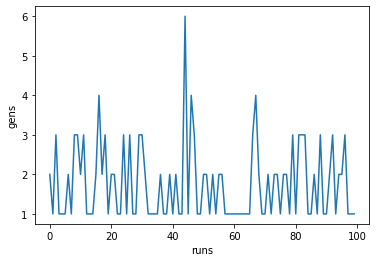

In [4]:
#Hatice Turan
#190503011

import random as rnd
import numpy as np
import matplotlib.pyplot as plt

POPULATION_SIZE = 8
MUTATION_RATE = 0.25
TOURNAMENT_SELECTION_SIZE = 4

class Course:
    def __init__(self, name, instructor, grade):
        self.name = name
        self.instructor = instructor
        self.grade = grade
        

    def __str__(self):
        return self.id + "by" + self.instructors

class Professor:
  def __init__(self, name, surname):
      self.name = name
      self.surname = surname

  def __str__(self):
    return self.name + " " + self.surname


class Room(object):
  def __init__(self, name, capacity):
      self.name = name
      self.capacity = capacity

  def __str__(self):
    return self.name


#Professors at TDU
P1 = Professor("Canan","Yıldız")
P2 = Professor("Faruk", "Bagcı")
P3 = Professor("Volkan", "Gezer")
P4 = Professor("Emel", "Maden")
P5 = Professor("Emre", "Isık")
P6 = Professor("Dilek", "Goksel")
P7 = Professor("Sanam", "Moghaddamnia")
P8 = Professor("Berkant", "Bostan")
P9 = Professor("Omer", "Karacan")
professors = [P1, P2, P3, P4, P5, P6, P7, P8, P9]

#Courses at TDU
C1 = Course("Inf101", P3, 1)
C2 = Course("Inf103", P2, 1)
C3 = Course("Inf107", P2 ,1)

C4 = Course("Inf201", P1, 2)
C5 = Course("Inf203", P4, 2)
C6 = Course("Inf205", P1, 2)
C7 = Course("Inf209", P2, 2)

C8 = Course("Inf303", P9, 3)
C9 = Course("Inf506", P5, 3)
C10 = Course("Inf701", P1,3)
C11 = Course("ETE101", P7,3)

C12 = Course("Inf523", P6, 4)
C13 = Course("Inf714", P5, 4)
C14 = Course("Inf905", P8, 4)
C15 = Course("INF517", P1, 4)
courses = [C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, C15]

#Rooms at TDU
R1 = Room("R1",100)
R2 = Room("R2",100)
R3 = Room("R3",100)

rooms = [R1, R2, R3]

# Meeetings Times
hours = ["08.00","10.00","12.00","14.00","16.00"]
days = ["Mon","Tue","Wed","Thu","Fri"]

class scheduledCourse:
    def __init__(self, course, room, day, hour):
        self.course = course
        self.room = room
        self.day = day
        self.hour = hour

    def __str__(self):
        return "[" + self.course.name + ", " + self.course.instructor + ", " + self.room + ", " + self.day + ", " + self.hour + "] \n"

class schedule:
    def __init__(self, scheduledCourses):
        self.scheduledCourses = scheduledCourses
        self.fitness = calculateFitness(scheduledCourses)

    def __str__(self):
        s = ""
        for i in self.scheduledCourses:
            s = s + "[" + i.course.name + ", " + str(i.course.instructor) + ", " + str(i.room) + ", " + i.day + ", " + i.hour + "] \n"
        return s

def createPopulation():
    ##Create a random population
    for i in range(POPULATION_SIZE):
        global population
        scheduled = []
        for k in courses:
            scheduled.append(scheduledCourse(k, rooms[rnd.randrange(0, len(rooms))], hours[rnd.randrange(0, len(hours))], days[rnd.randrange(0, len(days))]))

        population.append(schedule(scheduled))
    
    population = sorted(population, key=lambda a : a.fitness)


def calculateFitness(individual):
    ##Calculate fittness value for each individual 
    fitness = 0
    for i in individual:
        for k in individual:
            if i == k: continue
            if i.day == k.day and i.hour == k.hour:
                if i.room == k.room:
                    fitness += 1
                if i.course.instructor == k.course.instructor:
                    fitness += 1
                if i.course.grade == k.course.grade:
                    fitness += 1
                    
    return fitness // 2


def selectParent():
    parents = []
    for ind in population:
        #Select random 4 parents and order them according to their fitness values
        i = 0
        while i < TOURNAMENT_SELECTION_SIZE:
            parents.append(population[rnd.randrange(0, POPULATION_SIZE)])
            i = i + 1
        
    parents.sort(key=lambda x: x.fitness, reverse= True)    
    
    return parents

def crossover(parents):
    #Select 2 random crosspoints and generate offsprings
    point1 = rnd.randint(0, len(parents[0].scheduledCourses)- 12)
    point2 = rnd.randint(point1, len(parents[1].scheduledCourses))

    offspring_1 = schedule(parents[0].scheduledCourses[:point1] + parents[1].scheduledCourses[point1:point2] + parents[0].scheduledCourses[point2:])
    offspring_2 = schedule(parents[1].scheduledCourses[:point1] + parents[0].scheduledCourses[point1:point2] + parents[1].scheduledCourses[point2:])

    return offspring_1, offspring_2

def mutation(offspring):
    #Change a random value if mutation happens
    for i in offspring.scheduledCourses:
        if rnd.random() < MUTATION_RATE:
            dice = rnd.randrange(1,3)
            if dice == 1:
                i.room = rooms[rnd.randrange(0, len(rooms))]
            elif dice == 2:
                i.day = days[rnd.randrange(0, len(days))]
            elif dice == 3:
                i.slot = hours[rnd.randrange(0, len(hours))]

    return offspring

def selection(offsprings):
    global population
    #make a new generation with the best individuals
    new_gen = population + offsprings
    new_gen = sorted(new_gen, key=lambda ind: ind.fitness)[:POPULATION_SIZE]
   
    population = new_gen


def evolution():

    offsprings = []

    while len(offsprings) != len(population):
        
        parents = selectParent()

        off1, off2 = crossover(parents)

        off1 = mutation(off1)
        off2 = mutation(off2)

        #Check if the offsprings list has a duplicate in it
        control1 = True
        for i in offsprings:
            
            if (i.__str__() == off1.__str__()) or (i.__str__() == off2.__str__()):
                control1 = False
                break
        #Check if the offsprings already exists in population
        control2 = True
        for i in population:
            if (i.__str__() == off1.__str__()) or (i.__str__() == off2.__str__()):
                control2 = False
                break
       

        if control1 and control2:
            offsprings.append(off1)
            offsprings.append(off2)

        
    selection(offsprings)


# Start
gens = []
runs = []
for run in range(100):
    population = []

    createPopulation()
    print(f'Run: {run}')
    control = False
    solution = None

    gen = 0
    while gen < 500:
        print("GEN: " + str(gen))

        index = 1
        for i in population:
            
            print("Individual " + str(index) + " with fitness score " + str(i.fitness))
            print(i)

            if i.fitness == 0:
                control = True
                solution = i
            
            index += 1
        gen += 1

        if control: break
        elif control == False:
            evolution()

    if control:
        print("Solution found")
        print("Generation: " + str(gen))
        print(solution)
        gens.append(gen) 
        runs.append(run)
    else:
        print("Solution not found")

print(f'Mean: {np.mean(gens)}')
print(f'St. dev: {np.std(gens)}')
print(f'Min: {min(gens)}')
print(f'Max: {max(gens)}')

plt.plot(runs,gens)
plt.xlabel("runs")
plt.ylabel("gens")
plt.show()
